In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
msg = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])

In [4]:
msg

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
msg.shape

(5572, 2)

In [6]:
msg['label'].unique()

array(['ham', 'spam'], dtype=object)

In [7]:
msg.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
msg['length'] = msg['message'].apply(len)
msg.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


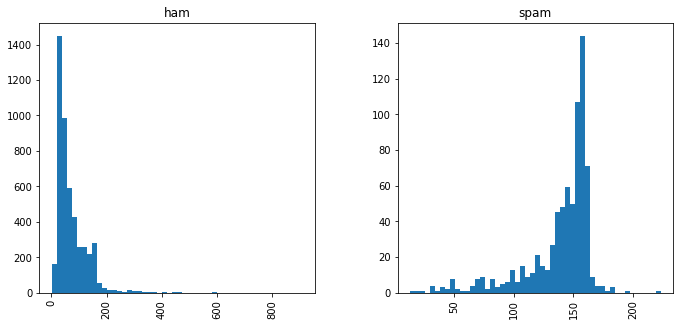

In [9]:
msg.hist(column='length', by='label', bins=50,figsize=(11,5))
plt.show()

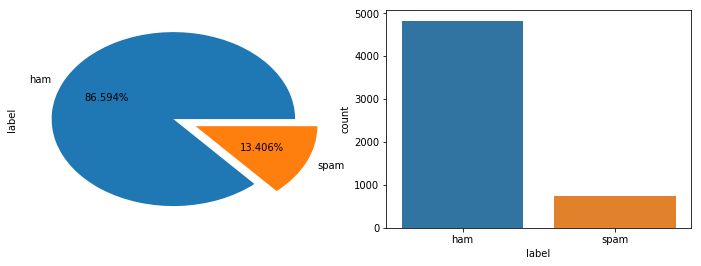

In [59]:
fig,ax=plt.subplots(1,2, figsize=(12,4))
msg.label.value_counts().plot.pie(explode=[0,0.20],autopct='%1.3f%%',ax=ax[0])
sns.countplot('label',data=msg)
plt.show()

In [11]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords

In [13]:
from nltk.stem import WordNetLemmatizer

In [14]:
wl = WordNetLemmatizer()

In [15]:
corpus = []
for i in range(len(msg)):
    corrections = re.sub('[^a-zA-Z]',' ', msg['message'][i])
    corrections = corrections.lower()
    corrections = corrections.split()
    corrections =[ wl.lemmatize(j) for j in corrections if not j in set(stopwords.words('english'))]
    corrections = ' '.join(corrections)
    corpus.append(corrections)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
cv = CountVectorizer(max_features=5000)

In [18]:
x = cv.fit_transform(corpus).toarray()

In [19]:
x.shape

(5572, 5000)

In [20]:
pd.get_dummies(msg['label'])

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
5,0,1
6,1,0
7,1,0
8,0,1
9,0,1


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [23]:
y = le.fit_transform(msg['label'])
y

array([0, 0, 1, ..., 0, 0, 0])

In [24]:
y[0:5]

array([0, 0, 1, 0, 0])

In [25]:
y1 = pd.get_dummies(msg['label']).iloc[:,1]

In [26]:
y1

0       0
1       0
2       1
3       0
4       0
5       1
6       0
7       0
8       1
9       1
10      0
11      1
12      1
13      0
14      0
15      1
16      0
17      0
18      0
19      1
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
5542    0
5543    0
5544    0
5545    0
5546    0
5547    1
5548    0
5549    0
5550    0
5551    0
5552    0
5553    0
5554    0
5555    0
5556    0
5557    0
5558    0
5559    0
5560    0
5561    0
5562    0
5563    0
5564    0
5565    0
5566    1
5567    1
5568    0
5569    0
5570    0
5571    0
Name: spam, Length: 5572, dtype: uint8

In [27]:
n_y=y1.values

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, n_y, test_size = 0.2 )

In [30]:
from sklearn.svm import SVC

In [31]:
classifier = SVC(random_state = 0, kernel='linear')

classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [32]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 1, ..., 0, 1, 0], dtype=uint8)

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[966   4]
 [ 14 131]]


In [34]:
import sklearn.metrics

In [35]:
print(dir(sklearn.metrics))

['ConfusionMatrixDisplay', 'PrecisionRecallDisplay', 'RocCurveDisplay', 'SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'calinski_harabaz_score', 'check_scoring', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'dcg_score', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_r

In [36]:
from sklearn.metrics import classification_report

In [37]:
cr =classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       970
           1       0.97      0.90      0.94       145

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [38]:
from sklearn import naive_bayes

In [39]:
print(dir(naive_bayes))

['ABCMeta', 'BaseDiscreteNB', 'BaseEstimator', 'BaseNB', 'BernoulliNB', 'CategoricalNB', 'ClassifierMixin', 'ComplementNB', 'GaussianNB', 'LabelBinarizer', 'MultinomialNB', '_ALPHA_MIN', '_BaseDiscreteNB', '_BaseNB', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_check_partial_fit_first_call', '_check_sample_weight', 'abstractmethod', 'binarize', 'check_X_y', 'check_array', 'check_is_fitted', 'check_non_negative', 'column_or_1d', 'deprecated', 'label_binarize', 'logsumexp', 'np', 'safe_sparse_dot', 'warnings']


In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
gnb = GaussianNB()

In [54]:
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
pred = gnb.predict(x_test)
pred

array([1, 0, 1, ..., 0, 1, 0], dtype=uint8)

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
print(cm)

[[868 102]
 [ 19 126]]


In [58]:
cr =classification_report(y_test, pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       970
           1       0.55      0.87      0.68       145

    accuracy                           0.89      1115
   macro avg       0.77      0.88      0.81      1115
weighted avg       0.92      0.89      0.90      1115



In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2) #p is for euclidean dist
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [44]:
p =classifier.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, classifier.predict(x_test))
print(cm)

[[970   0]
 [116  29]]


In [45]:
cr =classification_report(y_test, p)
print(cr)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       970
           1       1.00      0.20      0.33       145

    accuracy                           0.90      1115
   macro avg       0.95      0.60      0.64      1115
weighted avg       0.91      0.90      0.86      1115

